In [3]:
import pandas as pd

In [5]:
sales = pd.read_csv('sales_data.csv', encoding='latin1')

In [9]:
with open('sales_data.csv', 'r', encoding='utf-8', errors='replace') as file:
    content = file.read()
from io import StringIO
sales = pd.read_csv(StringIO(content))

In [7]:
sales_Data = pd.DataFrame(sales)

In [21]:
sales_Data.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year
0,1,CA-2016-152156,08/11/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,2016
1,2,CA-2016-152156,08/11/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,2016
2,3,CA-2016-138688,12/06/2016,16/06/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714,2016


#### #Top 5 customers with the most purchases

In [24]:
customer_sales = sales_Data.groupby('Customer Name')['Sales'].sum()

# Sort the sales in descending order to get top 5 customers
top_5_customers = customer_sales.sort_values(ascending=False).head(5)

# Renaming the index to 'Top 5 Sales by Customer'
top_5_customers.index.name = 'Top 5 Sales by Customer'

top_5_customers

Top 5 Sales by Customer
Sean Miller      25043.050
Tamara Chand     19052.218
Raymond Buch     15117.339
Tom Ashbrook     14595.620
Adrian Barton    14473.571
Name: Sales, dtype: float64

### Dropping NaN values

In [30]:
nan_df = sales_Data[sales_Data.isna().any(axis=1)]
nan_df
sales_Data = sales_Data.dropna(how='all')
sales_Data.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year
0,1,CA-2016-152156,08/11/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,2016
1,2,CA-2016-152156,08/11/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,2016


#### #Sales and profit distribution by region

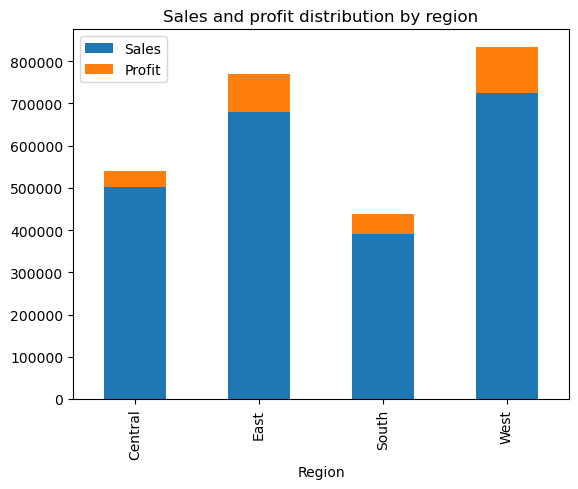

In [40]:
sales_Data.groupby("Region")[['Sales','Profit']].sum().plot(kind="bar",
                                                            title="Sales and profit distribution by region",
                                                            stacked = True);

### # What product by category sold the most?

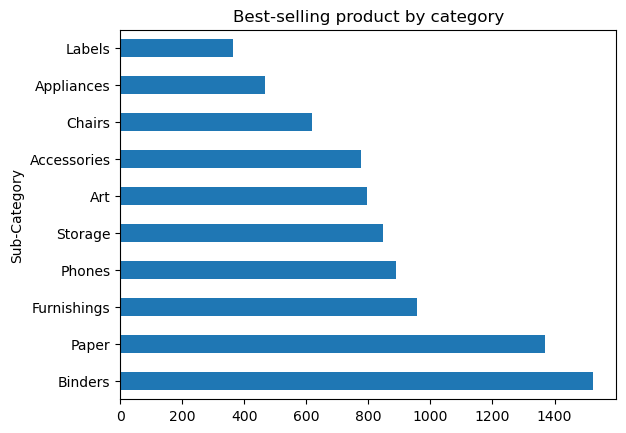

In [239]:
sales_Data.groupby('Sub-Category')['Sales'].count().sort_values(ascending=False).head(10).plot(kind='barh',title="Best-selling product by category");

### # What product by category sold the least?

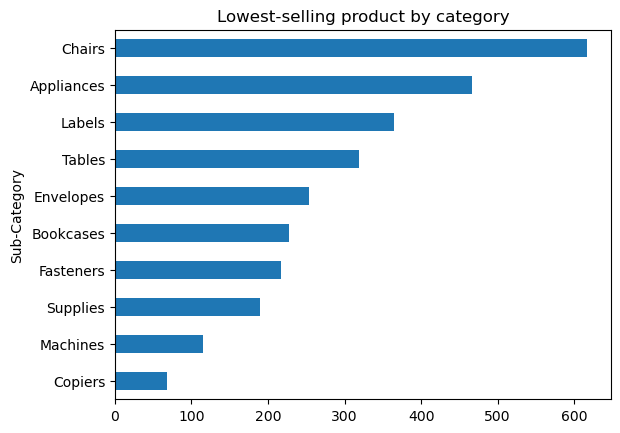

In [237]:
sales_Data.groupby('Sub-Category')['Sales'].count().sort_values(ascending=True).head(10).plot(kind='barh',title="Lowest-selling product by category");

# added additional Year column

In [23]:
sales_Data['Year'] = sales_Data['Order Date'].str[-4:]
sales_Data['Year'] = sales_Data['Year'].astype('int32')
sales_Data.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year
0,1,CA-2016-152156,08/11/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,2016
1,2,CA-2016-152156,08/11/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,2016


In [15]:
results= sales_Data.groupby('Year').sum()['Sales']
results

Year
2014    484247.4981
2015    470532.5090
2016    609205.5980
2017    733215.2552
Name: Sales, dtype: float64

### Sales by Year

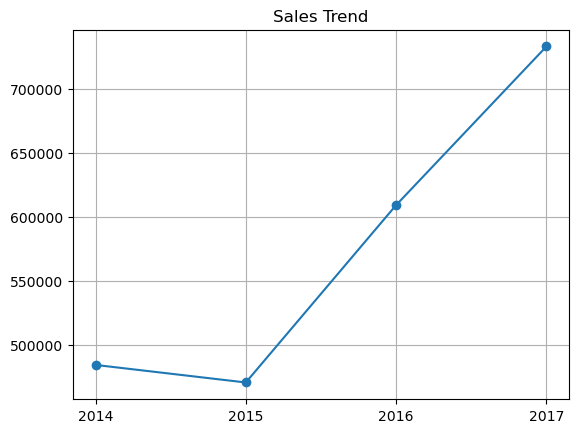

In [117]:
import matplotlib.pyplot as plt
years = [2014,2015,2016,2017]
plt.plot(years,results['Sales'],marker='o')
plt.xticks(years)
plt.title('Sales Trend')
plt.grid(True);

In [87]:
unique_values = sales_Data['Year'].unique()
unique_values

array([2016, 2015, 2014, 2017])